# HyFS fluxes

We use HyFS (hyfs_rd) surface fluxes for 2020. In this notebook, the metview module is used to explore the data and to select the gridpoint closest to a given location (lat, lon), resulting in a timeseries per location. From this timeseries average diurnal and seasonal cycle of sensible and latent heat flux as well as their partition are calculated.  <br>

### Properties of HyFS fluxes:
- temporal resolution: 6 h
- spatial resolution: ~31 km
- climate: v021
- original unit of fluxes: Joule per $m^2$
- accumulated on 6-hourly scale




### Postprocessing of HyFS fluxes:
- concatenate all months to one year (every month is stored in a separate file)
- select sshf and slhf
- find the nearest neighbor to a given location (lat, lon), e.g. station location
- divide by 3600 to get W/$m^2$ and multiply by (-1) for sign convention
- deaccumulation

In [26]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import pandas as pd
import numpy as np
import glob
import metview as mv
import xarray as xr
execfile("utils.py")
%matplotlib inline

In [2]:
#model data directory
dir="/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/hyfs_rd/2020/"
files=np.sort(glob.glob(dir+"/*"))
files

array(['/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/hyfs_rd/2020/fluxes_hyfs_202001',
       '/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/hyfs_rd/2020/fluxes_hyfs_202002',
       '/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/hyfs_rd/2020/fluxes_hyfs_202003',
       '/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/hyfs_rd/2020/fluxes_hyfs_202004',
       '/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/hyfs_rd/2020/fluxes_hyfs_202005',
       '/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/hyfs_rd/2020/fluxes_hyfs_202006',
       '/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/hyfs_rd/2020/fluxes_hyfs_202007',
       '/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/hyfs_rd/2020/fluxes_hyfs_202008',
       '/home/lauracma/Documents/ecmwf_proj/data

## Explore file format with metview

In [3]:
tmp=mv.read(files[0])
tmp.describe() #overview

parameter,typeOfLevel,level,date,time,step,paramId,class,stream,type,experimentVersionNumber
slhf,surface,0,20200101,0,"6,12,...",147,rd,oper,fc,hyfs
sshf,surface,0,20200101,0,"6,12,...",146,rd,oper,fc,hyfs


In [4]:
#select a variable
sh=tmp["sshf"]
lh=tmp["slhf"]
sh.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType
Message,,,,,,,,,
0,ecmf,sshf,surface,0,20200101,0,6,fc,reduced_gg
1,ecmf,sshf,surface,0,20200101,0,12,fc,reduced_gg
2,ecmf,sshf,surface,0,20200101,0,18,fc,reduced_gg
3,ecmf,sshf,surface,0,20200101,0,24,fc,reduced_gg
4,ecmf,sshf,surface,0,20200101,0,30,fc,reduced_gg
5,ecmf,sshf,surface,0,20200101,0,36,fc,reduced_gg
6,ecmf,sshf,surface,0,20200101,0,42,fc,reduced_gg
7,ecmf,sshf,surface,0,20200101,0,48,fc,reduced_gg
8,ecmf,sshf,surface,0,20200101,0,54,fc,reduced_gg


## Prepare data for one year (timeseries)

In [5]:
#concatenate all months (to one year, 2020)
sh=mv.Fieldset() #allocate
lh=mv.Fieldset()

for i in range(12):
    tmp=mv.read(files[i]) #read model per month
    sh_tmp=tmp["sshf"]
    lh_tmp=tmp["slhf"]
    sh.append(sh_tmp)
    lh.append(lh_tmp) 

In [6]:
sh.describe()

parameter,typeOfLevel,level,date,time,step,paramId,class,stream,type,experimentVersionNumber
sshf,surface,0,"20200101,20200201,...",0,"6,12,...",146,rd,oper,fc,hyfs


In [7]:
#find nearest gridpoint
coords=[50,10]
sh_mod_coord=np.array(sh.nearest_gridpoint(coords))/(6*3600*-1)
lh_mod_coord=np.array(lh.nearest_gridpoint(coords))/(6*3600*-1)

#deaccumulation
sh_mod_coord[3::4]=sh_mod_coord[3::4]-sh_mod_coord[2::4]
sh_mod_coord[2::4]=sh_mod_coord[2::4]-sh_mod_coord[1::4]
sh_mod_coord[1::4]=sh_mod_coord[1::4]-sh_mod_coord[0::4]

lh_mod_coord[3::4]=lh_mod_coord[3::4]-lh_mod_coord[2::4]
lh_mod_coord[2::4]=lh_mod_coord[2::4]-lh_mod_coord[1::4]
lh_mod_coord[1::4]=lh_mod_coord[1::4]-lh_mod_coord[0::4]

dimension: (1464,)
#measurements (theoretically): 1464


Text(0.5, 0, 'index')

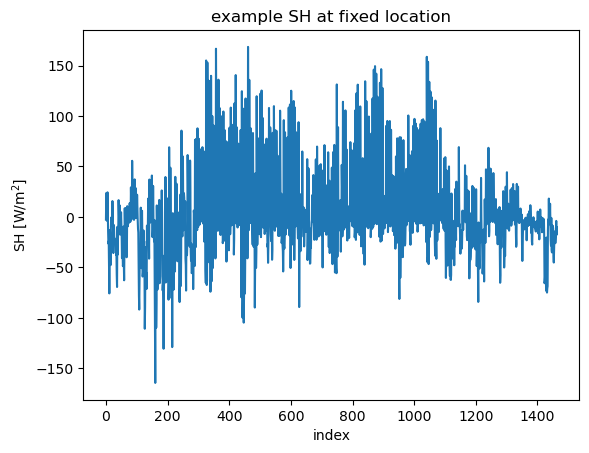

In [8]:
#check dimension
print("dimension: " + str(np.shape(sh_mod_coord)))
print("#measurements (theoretically): " + str(4*366))

#plot example
plt.plot(sh_mod_coord)
plt.title("example SH at fixed location")
plt.ylabel(r"SH [W/m$^2$]")
plt.xlabel("index")

## Average seasonal and diurnal cycle

In [27]:
sh_seasonal_cycle=mean_seasonal_cycle(sh_mod_coord)
lh_seasonal_cycle=mean_seasonal_cycle(lh_mod_coord)

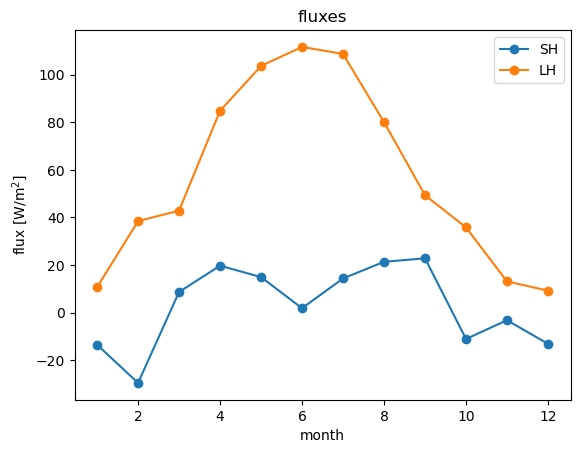

In [28]:
maxis=np.linspace(1,12,12)
plt.plot(maxis,sh_seasonal_cycle,"-o",label="SH")
plt.plot(maxis,lh_seasonal_cycle,"-o",label="LH")
plt.xlabel("month")
plt.ylabel(r"flux [W/m$^2$]")
plt.title("fluxes")
plt.legend()

Text(0.5, 0, 'month')

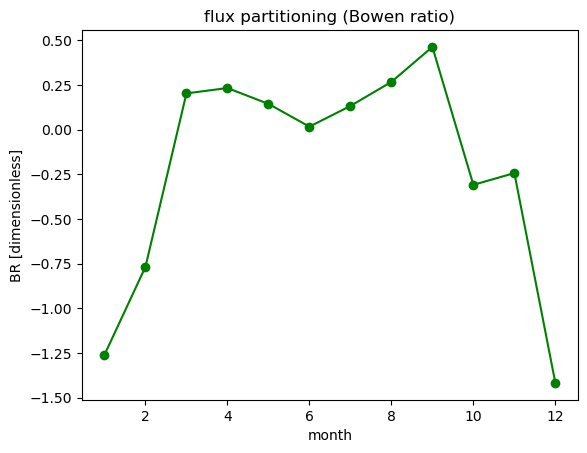

In [29]:
plt.plot(maxis,sh_seasonal_cycle/lh_seasonal_cycle,"-o",label="BR (partitioning)",color="green")
plt.title("flux partitioning (Bowen ratio)")
plt.ylabel("BR [dimensionless]")
plt.xlabel("month")

In [20]:
sh_mat=np.empty((12,4))
lh_mat=np.empty((12,4))
res=4
monlen=[31,29,31,30,31,30,31,31,30,31,30,31]
for i in range(12):
    for j in range(4):
        tmp=sh_mod_coord[sum(monlen[:(i)]*res):sum(monlen[:i+1]*res)] #select month
        sh_mat[i,j]=np.nanmean(tmp[j::4]) 
        tmp=lh_mod_coord[sum(monlen[:(i)]*res):sum(monlen[:i+1]*res)] #select month
        lh_mat[i,j]=np.nanmean(tmp[j::4])

Text(0.5, 1.0, '  LH: average seasonal and diurnal cycle   [$W/m^2$]')

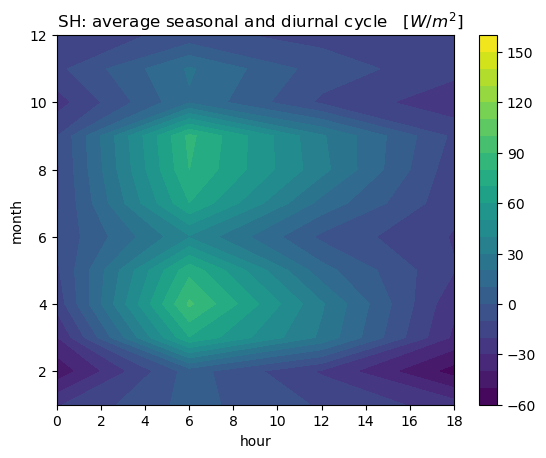

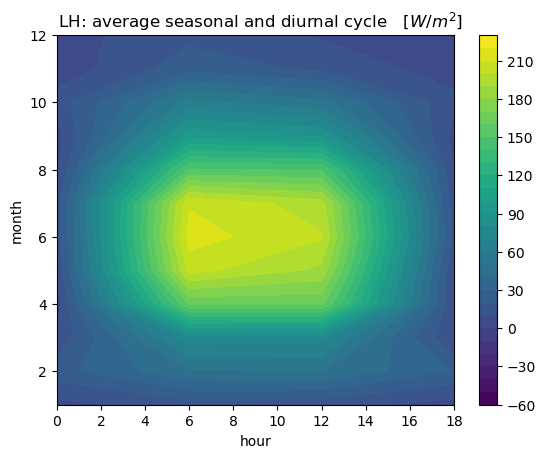

In [30]:
maxis=np.linspace(1,12,12)
haxis=np.linspace(0,18,4)

fig,ax = plt.subplots()
cf=ax.contourf(haxis,maxis,sh_mat,levels=np.linspace(-60,160,23))
cbar = fig.colorbar(cf)
ax.axes.set_xlabel("hour")
ax.axes.set_ylabel("month")
ax.set_title(r"  SH: average seasonal and diurnal cycle   [$W/m^2$]")

fig,ax = plt.subplots()
cf=ax.contourf(haxis,maxis,lh_mat,levels=np.linspace(-60,230,30))
cbar = fig.colorbar(cf)
ax.axes.set_xlabel("hour")
ax.axes.set_ylabel("month")
ax.set_title(r"  LH: average seasonal and diurnal cycle   [$W/m^2$]")